# Transaction Analysis

Every correspondent bank is obliged to conduct due dilligence and transaction review. The definition of correspondent banking is: Banks in a country that are set up to provide services for another bank or financial institution in a foreign country. The services provided by a correspondent bank include money transfers, currency exchange, trade documentation and business transactions. Typically, in a correspondent banking relation, two banks in two different countries enter into an agreement to open a correspondent account, which enables a domestic bank to make payments or do money transfers in local currency on behalf of a foreign bank. Correspondent banking relationships are recognised globally as being vulnerable to exploitation for money laundering and terrorism financing (ML/TF) purposes. 


This project presents analytical part of periodic transaction review of transactions that were executed within 3 months period.


Transactions data is saved in excel file. It contains random names, addresses and values of transfers. 


Description of columns in data
- Booking Month
- GFCID (Global Finance Customer Identification) - identification number of Bank which is the customer
- Account number - account number of the bank that out bank is offering service
- Booking date - date when transaction was booked
- Transaction Ref Number - unique identifier assigned to a transaction
- Transaction Type - can be Commercial or Treasury. Treasury transactions are for example related to derivative, intrest, foreign exchange or currency purchase usually send to and from financial intitutions. Commercial transactions are payments for good and services between customers or businesses. In this project commercial transactions will analyzed. 
- Credit/Debit 
- Currency in which transaction was made
- Original Currency Amount
- Converted Currnecy Amount - Amount of transaction in amercian dollars.
- ORG Custoemr ID - unique ID of Originator (the sender of the payment order in a funds transfer)
- ORG Name, OGR Address, ORG Country - name and address details of Originator
- OGB Country - Country of the originator's bank (bank to which the payment order of the originator is issued if the originator is not a bank)
- BBK Country - Country of the beneficiary's bank (bank receiving the payment)
- BNF Custoemr ID - unique ID of Beneficiary (recipient of fund transfers)
- BNF Name, BNF Address, BNF Country - name and address details of Beneficiary


In [213]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, time, datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [813]:
#Downloading and saving data
Transactions = pd.read_excel(r'C:\Users\kasia\OneDrive\Pulpit\udemy\python\Transactions.xlsx')

In [814]:
Transactions.head()

,Booking Month,GFCID,Acct Number,Booking Date,Transaction Ref Number,Transaction Type,Credit/Debit,Currency,Original Currency Amount,Converted Currency Amount,ORG Cutomer ID,ORG Name,ORG Address,ORG Country,OGB Country,BBK Country,BNF ID,BNF Name,BNF Address,BNF Country
0,January,1058884562,36785654,2022-01-09,16991896,Commercial,CREDIT,USD,25768132,25768132,8591076781,UnitedHealth Group Incorporated,NaN,United States,United States,United Kingdom,4478501400,"Majestic Wine & Deli, Inc.",Watford,United Kingdom
1,January,1058884562,38865000,2022-01-03,18352650,Commercial,DEBIT,USD,24123657,24123657,7458111145,Evergreen Line,NaN,Taiwan,Taiwan,United States,3466400426,Western Union Company,Denver,United States
2,February,1058884562,36785654,2022-02-04,13394489,Commercial,DEBIT,USD,17446705,17446705,8581111445,Gazprom,NaN,Russia,Russia,Russia,8581111445,Gazprom,NaN,Russia
3,February,1058884562,36785654,2022-02-06,16172684,Commercial,DEBIT,USD,15578400,15578400,5125454555,Airbus,Paris,France,France,United Kingdom,9040688299,Royal Dutch Shell Company,London,United Kingdom
4,February,1058884562,36785654,2022-02-22,14774438,Commercial,CREDIT,USD,14206552,14206552,1112036044,Lloyds Bank,London,United Kingdom,United Kingdom,Bahrain,1000254510,Arab Banking Corporation B.S.C,Manama,Bahrain


In [815]:
#Names of columns 
Transactions.columns

Index(['Booking Month', 'GFCID', 'Acct Number', 'Booking Date',
       'Transaction Ref Number', 'Transaction Type', 'Credit/Debit',
       'Currency', 'Original Currency Amount', 'Converted Currency Amount',
       'ORG Cutomer ID', 'ORG Name', 'ORG Address', 'ORG Country',
       'OGB Country', 'BBK Country', 'BNF ID', 'BNF Name', 'BNF Address',
       'BNF Country'],
      dtype='object')

In [816]:
#checking how many transactions are in dataframe. We can see that within 3 months period there were 367 transactions
Transactions.shape

(367, 20)

In [817]:
Transactions.dtypes

Booking Month                        object
GFCID                                 int64
Acct Number                           int64
Booking Date                 datetime64[ns]
Transaction Ref Number                int64
Transaction Type                     object
Credit/Debit                         object
Currency                             object
Original Currency Amount              int64
Converted Currency Amount             int64
ORG Cutomer ID                        int64
ORG Name                             object
ORG Address                          object
ORG Country                          object
OGB Country                          object
BBK Country                          object
BNF ID                                int64
BNF Name                             object
BNF Address                          object
BNF Country                          object
dtype: object

In [818]:
#adding "_" in column names instead of spaces
Transactions.columns = Transactions.columns.str.replace(' ','_')
Transactions.columns

Index(['Booking_Month', 'GFCID', 'Acct_Number', 'Booking_Date',
       'Transaction_Ref_Number', 'Transaction_Type', 'Credit/Debit',
       'Currency', 'Original_Currency_Amount', 'Converted_Currency_Amount',
       'ORG_Cutomer_ID', 'ORG_Name', 'ORG_Address', 'ORG_Country',
       'OGB_Country', 'BBK_Country', 'BNF_ID', 'BNF_Name', 'BNF_Address',
       'BNF_Country'],
      dtype='object')

In [819]:
#checking in wich currencies transfers were made

Transactions.Currency.unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

In [820]:
#in Transactions "converted currency amount" is a copy of "original currency amount" and containg wrong data.
#Correct values in "converted currency amount" should be converted based on origonal currency. 

#Below is a code which converts values

for index, row in Transactions.iterrows():
    if row['Currency'] == 'EUR':
        Transactions.loc[index, 'Converted_Currency_Amount'] = row['Original_Currency_Amount']*1.05
    elif row['Currency'] == 'GBP':
        Transactions.loc[index, 'Converted_Currency_Amount'] = row['Original_Currency_Amount']*1.21
    elif row['Currency'] == 'USD':
        Transactions.loc[index, 'Converted_Currency_Amount'] = row['Original_Currency_Amount']



In [821]:
#checking if currency ampount for EUR
Transactions[Transactions['Currency'] == 'EUR'].head(5)

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
10,January,1058884562,38865000,2022-01-07,13835874,Commercial,CREDIT,EUR,9934154,10430861.70,1000254510,Arab Banking Corporation B.S.C,Manama,Bahrain,Bahrain,Ireland,5652548789,Docklands Bus & Coach Park,Dublin,Ireland
12,March,1058884562,36785654,2022-03-05,10202885,Commercial,CREDIT,EUR,9837856,10329748.80,1005455989,Citibank NA,New York,United States,United States,United Kingdom,1112036044,Lloyds Bank,London,United Kingdom
18,January,1058884562,36785654,2022-01-17,13591683,Commercial,DEBIT,EUR,9336885,9803729.25,1005455989,Citibank NA,New York,United States,United States,United Arab Emirates,1459898985,Emaar Properties,Dubai,United Arab Emirates
20,February,1058884562,36785654,2022-02-08,12877598,Commercial,DEBIT,EUR,9267431,9730802.55,1005455989,Citibank NA,New York,United States,United States,Belarus,2445560826,Sta Logistic Ltd,Minsk,Belarus
29,March,1058884562,36785654,2022-03-11,10619765,Treasury,CREDIT,EUR,7747777,8135165.85,1112036044,Lloyds Bank,London,United Kingdom,United Kingdom,United Arab Emirates,2049989878,Abu Dhabi Commercial Bank,Abu Dhabi,United Arab Emirates


In [822]:
currency_count = Transactions.Currency.value_counts()
currency_count

USD    321
EUR     26
GBP     20
Name: Currency, dtype: int64

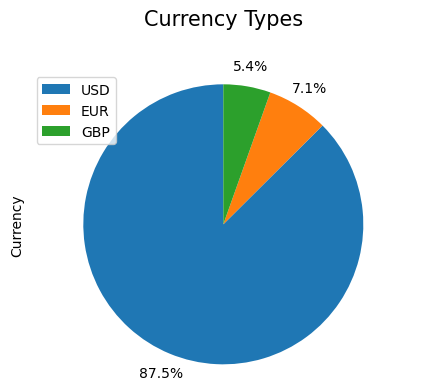

In [823]:
#pie chart ilustraying proportions of currency types in transactions

currency_count.plot(kind='pie',
                            figsize=(5, 4),
                            autopct='%1.1f%%', 
                            startangle=90,           
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Currency Types', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=currency_count.index, loc='upper left', fontsize=10) 

plt.show()

## Data Cleansing
- removing duplicates

The next step in analysis will be data cleansing to better understand behaviors and model spend patterns through customer transaction analysis. This p

- removing duplicates
- handling missing data
- correcting names of originators and beneficiaries. Change of names is important step as many transfers indicates same entity but are not grouped together because of small differances in writing. 

#### Removing duplicates

In [824]:
#checking if any transaction was duplicated. Transaction_Ref_Number should be unique for each transaction

Transactions[Transactions.duplicated(subset=['Transaction_Ref_Number'])]

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
227,January,1058884562,36785654,2022-01-08,16628386,Commercial,DEBIT,USD,188085,188085.0,1000254510,Arab Banking Corporation B.S.C,Manama,Bahrain,Bahrain,United Kingdom,1014787879,General Electric Company,Coventry,United Kingdom


In [825]:
#delating duplicate
Transactions=Transactions.drop(index=227)

In [826]:
Transactions.shape

(366, 20)

#### Cleansing ORG and BNF columns

In [827]:
#delating special characters in all columns - names and address details.
Transactions.replace('[./(),;]', ' ', regex=True, inplace=True)

In [828]:
#replacing characters/abbrevations in ORG and BNF names.


ORGBNF_Name = Transactions[['ORG_Name', 'BNF_Name']]

to_replace = {'&': 'and', '[Cc]orporation': 'Corp', '[Ll]imited': 'Ltd', '[Cc]ompany' : 'Co', '  ': ' ',}

# .keys() returns a list of all the keys in the dictionary
for char in to_replace.keys():
    ORGBNF_Name= ORGBNF_Name.replace(char, to_replace[char], regex = True)


Transactions[['ORG_Name', 'BNF_Name']] = ORGBNF_Name 
Transactions[['ORG_Name', 'BNF_Name']]

,ORG_Name,BNF_Name
0,UnitedHealth Group Incorporated,Majestic Wine and Deli Inc
1,Evergreen Line,Western Union Co
2,Gazprom,Gazprom
3,Airbus,Royal Dutch Shell Co
4,Lloyds Bank,Arab Banking Corp B S C
...,...,...
362,Ali Gujjar,Samsung Electronics Co Ltd
363,Mateusz Mickiewicz,Citibank NA
364,Western Union Co,Danone SA
365,Joanna Nowak,Western Union Co


In [829]:
#other ways of cleaisng data

#2.
Transactions.update(Transactions.loc[:, ['ORG_Name', 'BNF_Name']].replace('  ', ' ', regex=True))
Transactions.update(Transactions.loc[:, ['ORG_Name', 'BNF_Name']].replace('&', 'and', regex=True))
Transactions.update(Transactions.loc[:, ['ORG_Name', 'BNF_Name']].replace('[Cc]orporation', 'Corp', regex=True))
Transactions.update(Transactions.loc[:, ['ORG_Name', 'BNF_Name']].replace('[Ll]imited', 'Ltd', regex=True))
Transactions.update(Transactions.loc[:, ['ORG_Name', 'BNF_Name']].replace('[Cc]ompany', 'Co', regex=True))

#3.
ORGBNF_Name = Transactions.loc[:, ['ORG_Name','BNF_Name']]

ORGBNF_Name.replace('  ', ' ', regex=True, inplace=True)
ORGBNF_Name.replace('&', 'and', regex=True, inplace=True)
ORGBNF_Name.replace('[Cc]orporation', 'Corp', regex=True, inplace=True)
ORGBNF_Name.replace('[Ll]imited', 'Ltd', regex=True, inplace=True)
ORGBNF_Name.replace('[Cc]ompany', 'Co', regex=True, inplace=True)

Transactions[['ORG_Name','BNF_Name']] = ORGBNF_Name

In [830]:
#delateing spaces before and after names
Transactions['ORG_Name']= Transactions['ORG_Name'].str.strip()
Transactions['BNF_Name']= Transactions['BNF_Name'].str.strip()

In [831]:
#checking if names were change correctly, for example if "company" still appears in column BNF_Name

Transactions[Transactions['BNF_Name'].str.contains('Company')]

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country


#### Handling missing data

In [832]:
#checking if there are transactions missing data in BBK and OGB columns.

Transactions[Transactions.BBK_Country.isna()] 

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
22,January,1058884562,38865000,2022-01-22,15889132,Commercial,DEBIT,USD,8942743,8942743.0,3466400426,Western Union Co,Denver,United States,United States,NaN,1441214521,Cargill Inc,Wayzata Minnesota,United States
147,February,1058884562,36785654,2022-02-21,15736642,Commercial,DEBIT,USD,626347,626347.0,7900001410,McKinsey and Co,New York,United States,United States,NaN,6319115507,Sepe-fashion de,Aschaffenburg,Germany


In [833]:
Transactions[Transactions.OGB_Country.isna()]

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
216,January,1058884562,38865000,2022-01-21,16332718,Commercial,DEBIT,GBP,257048,311028.08,1014787879,General Electric Co,Coventry,United Kingdom,NaN,Taiwan,7861172560,Yang Ming Marine Transport,Keelung,Taiwan


In [834]:
#Adding country names to OGB and BBK columns. 
#OGB_Country will be same as ORG_Country and BBK_Country will be same as OGB_Country

Transactions.BBK_Country = Transactions.BBK_Country.fillna(value=Transactions.BNF_Country)
Transactions.loc[216, 'OGB_Country'] = 'United Kingdom'

In [835]:
#checking again if there is missing data
Transactions[Transactions.BBK_Country.isna()]

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country


## Values of transactions

In [836]:
# Checking how many transactions are greater than $10.000.

Transactions[Transactions.Original_Currency_Amount.between(10000, Transactions.Original_Currency_Amount.max())]\
.sort_values(by='Original_Currency_Amount', ascending=False)

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
0,January,1058884562,36785654,2022-01-09,16991896,Commercial,CREDIT,USD,25768132,25768132.0,8591076781,UnitedHealth Group Incorporated,NaN,United States,United States,United Kingdom,4478501400,Majestic Wine and Deli Inc,Watford,United Kingdom
1,January,1058884562,38865000,2022-01-03,18352650,Commercial,DEBIT,USD,24123657,24123657.0,7458111145,Evergreen Line,NaN,Taiwan,Taiwan,United States,3466400426,Western Union Co,Denver,United States
2,February,1058884562,36785654,2022-02-04,13394489,Commercial,DEBIT,USD,17446705,17446705.0,8581111445,Gazprom,NaN,Russia,Russia,Russia,8581111445,Gazprom,NaN,Russia
3,February,1058884562,36785654,2022-02-06,16172684,Commercial,DEBIT,USD,15578400,15578400.0,5125454555,Airbus,Paris,France,France,United Kingdom,9040688299,Royal Dutch Shell Co,London,United Kingdom
4,February,1058884562,36785654,2022-02-22,14774438,Commercial,CREDIT,USD,14206552,14206552.0,1112036044,Lloyds Bank,London,United Kingdom,United Kingdom,Bahrain,1000254510,Arab Banking Corp B S C,Manama,Bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,January,1058884562,36785654,2022-01-29,12442187,Commercial,CREDIT,USD,11897,11897.0,1112036044,Lloyds Bank,London,United Kingdom,United Kingdom,France,2045489878,Danone SA,Paris,France
315,February,1058884562,36785654,2022-02-06,11367628,Commercial,CREDIT,USD,11646,11646.0,3259405538,Verspreid Net B V,Aalsmeer,Netherlands,Netherlands,Mexico,1487747433,Jose Mora,NaN,Mexico
316,January,1058884562,38865000,2022-01-26,13905788,Commercial,DEBIT,USD,10905,10905.0,1000254510,Arab Banking Corp B S C,Manama,Bahrain,Bahrain,Netherlands,9507639174,te Slaa Schilders,Amsterdam,Netherlands
317,February,1058884562,36785654,2022-02-22,14068011,Commercial,DEBIT,USD,10869,10869.0,1489447433,La Buena Vida en Medialab,Madrid,Spain,Spain,United Arab Emirates,2049989878,Abu Dhabi Commercial Bank,Abu Dhabi,United Arab Emirates


In [837]:
#how many transactions lower than $10.000, between $10.000 and $500.000 and greater than $500.000
converted_values = Transactions['Converted_Currency_Amount']

x = [i for i in converted_values if i<=10000]
#value of x
low_values = len(x)

y = [i for i in converted_values if i>10000 and i <= 300000]
#value of x
medium_values = len(y)

z = [i for i in converted_values if i>500000]
#value of x
high_values = len(z)

In [838]:
low_values + medium_values + high_values

337

In [839]:
data = [['low transfers', len(x)], ['medium transfers', len(y)], ['high transfers', len(z)]]
values_transfers = pd.DataFrame(data, columns=['Values', 'counts']) 
values_transfers

,Values,counts
0,low transfers,48
1,medium transfers,121
2,high transfers,168


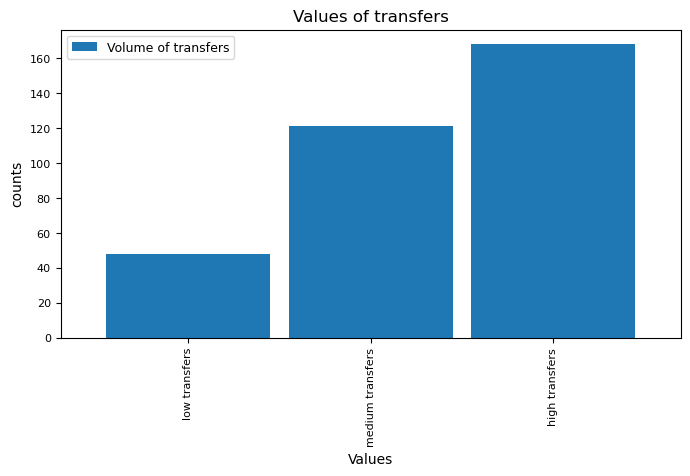

In [840]:
values_transfers.plot.bar(x='Values', 
             y='counts', 
             width = 0.9, 
             figsize=(8, 4)) 

plt.xlabel('Values', fontsize=10)
plt.ylabel('counts', fontsize=10)
plt.title('Values of transfers')

#['Originating Jurisdictions', 'Benefiting Jurisdictions', 'High Risk Originating Jurisdictions', ' High Risk Benefiting Jurisdictions']
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.legend(labels=['Volume of transfers'],\
           loc='upper left', fontsize=9) 
plt.show()

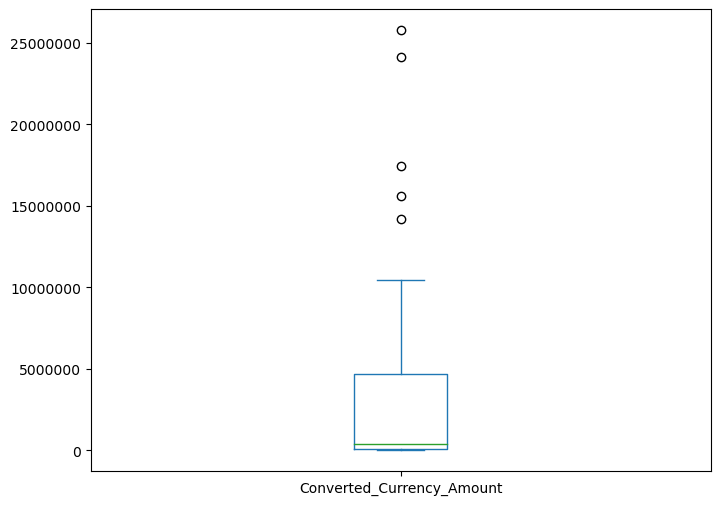

In [841]:
#creating a plot showing outlier transactions
Transactions['Converted_Currency_Amount'].plot(kind='box', figsize=(8, 6))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [842]:
#checking median, 1st, 2nd and 3rd quantile as it't not clear to read above
Transactions['Converted_Currency_Amount'].quantile([0.25,0.5,0.75])

# 25% of transactions are lower than $62,176
# 50% of transactions are lower than $399,159
# 75% of transactions are lower than $4,694,753

0.25      62176.500
0.50     399158.665
0.75    4694753.250
Name: Converted_Currency_Amount, dtype: float64

## Countries
This part of analysis will focus on country related data.

- highlighting transactions related to Russia and Belaruse
- adding "(H)" to country names which are defined as high risk by the Financial Action Task Force (FATF). High Risk countries have to be subject to enhanced due diligence (EDD).

In [843]:
# due to sanction restrictions related to war in Ukrain bank required to highlight transactions sent from or to Russia and Belarus. 

#creating a list Russia and Belarus names/abbrevations
BYRU = ['Russia', 'Belarus', 'russia', 'belarus', 'RU', 'BY', 'ru', 'by']
BYRU_s= pd.Series(BYRU)
BYRU_s

0     Russia
1    Belarus
2     russia
3    belarus
4         RU
5         BY
6         ru
7         by
dtype: object

In [844]:
#search of transactions where Russia or Belarus appeared in country field.


Trx_BYRU= Transactions[Transactions['BNF_Country'].isin(BYRU) | Transactions['ORG_Country'].isin(BYRU)\
| Transactions['OGB_Country'].isin(BYRU) | Transactions['BBK_Country']\
.isin(BYRU)].sort_values(by='Converted_Currency_Amount', ascending = False)


Trx_BYRU

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,ORG_Cutomer_ID,ORG_Name,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country
2,February,1058884562,36785654,2022-02-04,13394489,Commercial,DEBIT,USD,17446705,17446705.00,8581111445,Gazprom,NaN,Russia,Russia,Russia,8581111445,Gazprom,NaN,Russia
20,February,1058884562,36785654,2022-02-08,12877598,Commercial,DEBIT,EUR,9267431,9730802.55,1005455989,Citibank NA,New York,United States,United States,Belarus,2445560826,Sta Logistic Ltd,Minsk,Belarus
40,January,1058884562,36785654,2022-01-04,15595356,Commercial,CREDIT,USD,7345777,7345777.00,1002337855,Microsoft Corp,Albuquerque,United States,United States,Belarus,2445560826,Sta Logistic Ltd,Minsk,Belarus
313,March,1058884562,36785654,2022-03-02,12000688,Commercial,CREDIT,USD,14000,14000.00,2445560826,Sta Logistic Ltd,Minsk,Belarus,Belarus,Bolivia,1139370955,Universidad Nur,santa cruz,Bolivia
319,March,1058884562,36785654,2022-03-25,15887454,Commercial,CREDIT,USD,9686,9686.00,2445560826,Sta Logistic Ltd,Minsk,Belarus,Belarus,United States,7900001410,McKinsey and Co,New York,United States


In [845]:
# creating list of high risk countries. Transactions involving high risk countries should be highlighted.

HRJ_list = [ "Afganistan", "Bahrain", "Belarus", "Bolivia", "Brazil", "China", "Colombia", "Cyprus", "Iran", "Mexico", "Pakistan" \
            "Russia", "Ukraine", "United Arab Emirates"]

In [846]:
HRJ_list

['Afganistan',
 'Bahrain',
 'Belarus',
 'Bolivia',
 'Brazil',
 'China',
 'Colombia',
 'Cyprus',
 'Iran',
 'Mexico',
 'PakistanRussia',
 'Ukraine',
 'United Arab Emirates']

In [847]:
#adding (H) to high risk countries and creatign a new column "New_OGB_Country" which will be used in further analysis

Transactions['New_OGB_Country']= Transactions.OGB_Country.apply(lambda x: x + " (H)" if x in HRJ_list else x)

In [848]:
Transactions['New_OGB_Country']

0       United States
1              Taiwan
2              Russia
3              France
4      United Kingdom
            ...      
362          Pakistan
363            Poland
364     United States
365            Poland
366          Pakistan
Name: New_OGB_Country, Length: 366, dtype: object

In [849]:
#same for New_BBK_Country
Transactions['New_BBK_Country']= Transactions.BBK_Country.apply(lambda x: x + " (H)" if x in HRJ_list else x)
Transactions['New_BBK_Country']

0      United Kingdom
1       United States
2              Russia
3      United Kingdom
4         Bahrain (H)
            ...      
362       South Korea
363     United States
364            France
365     United States
366           Ireland
Name: New_BBK_Country, Length: 366, dtype: object

In [850]:
Transactions[Transactions['New_BBK_Country'].str.contains('(?:H)')].sample(3)

,Booking_Month,GFCID,Acct_Number,Booking_Date,Transaction_Ref_Number,Transaction_Type,Credit/Debit,Currency,Original_Currency_Amount,Converted_Currency_Amount,...,ORG_Address,ORG_Country,OGB_Country,BBK_Country,BNF_ID,BNF_Name,BNF_Address,BNF_Country,New_OGB_Country,New_BBK_Country
144,February,1058884562,36785654,2022-02-10,11435542,Treasury,DEBIT,USD,639440,639440.0,...,London,United Kingdom,United Kingdom,United Arab Emirates,2049989878,Abu Dhabi Commercial Bank,Abu Dhabi,United Arab Emirates,United Kingdom,United Arab Emirates (H)
272,March,1058884562,36785654,2022-03-02,11274723,Commercial,DEBIT,USD,68477,68477.0,...,Paris,France,France,Bahrain,1047485455,Batelco,Hamala,Bahrain,France,Bahrain (H)
146,March,1058884562,36785654,2022-03-04,14382129,Commercial,DEBIT,USD,630901,630901.0,...,Kijow,Ukraine,Ukraine,United Arab Emirates,1459898985,Emaar Properties,Dubai,United Arab Emirates,Ukraine (H),United Arab Emirates (H)


In [851]:
#creating new data frame "Commercial". Specific transaction analysis shoud be performed on only commercial data.

Commercial=Transactions[Transactions.Transaction_Type.str.contains('Commercial')]

In [852]:
#checking how many countries are high risk and how many are not

Commercial=Transactions[Transactions.Transaction_Type.str.contains('Commercial')]
Commercial['New_OGB_Country'].str.contains('(?:H)').value_counts()

False    282
True      64
Name: New_OGB_Country, dtype: int64

In [853]:
#combining OGB and BBK Countries together with corresponding account numbers.

Jurisdictions1 = Commercial.loc[:, ['Acct_Number', 'New_OGB_Country']]
Jurisdictions2 = Commercial.loc[:, ['Acct_Number', 'New_BBK_Country']]

#changing names of columns to match column names in Juristidction dataframe
Jurisdictions1.rename({'New_OGB_Country': 'Country'}, axis=1, inplace=True)
Jurisdictions2.rename(columns={'New_BBK_Country': 'Country'}, inplace=True)


Jurisdictions= pd.concat([Jurisdictions1, Jurisdictions2], ignore_index=True)


Jurisdictions

,Acct_Number,Country
0,36785654,United States
1,38865000,Taiwan
2,36785654,Russia
3,36785654,France
4,36785654,United Kingdom
...,...,...
687,38865000,South Korea
688,36785654,United States
689,36785654,France
690,36785654,United States


In [854]:
#checking which countries appeared the most 

# Robię tabele z podziałek na numer konta a w drgiej kolejności na kraj. Zliczam ile razy kraj się pojawia i jaki jest to procent ogólem
# Przy liczbie transakcji poniżej 5 tys do raportu jako Top Jurysdyckje podajemy te, które mają powyżej 4% 

Jurisdictions = Jurisdictions.groupby(['Acct_Number', 'Country']).agg(Volume = ('Country', 'count'))
Jurisdictions = Jurisdictions.groupby(level=0, group_keys=False).apply(lambda x : x.sort_values('Volume', ascending=False))

#dodaie kolumny z procentami
Jurisdictions['Percentage'] = (100 * Jurisdictions['Volume']/ Jurisdictions['Volume'].sum()).round(2)


#spr które mają powyżej 4%

Top_Jurisdictions = Jurisdictions[Jurisdictions.Percentage > 4 ]
Top_Jurisdictions

Volume  Percentage
Acct_Number Country                           
36785654    United Kingdom     121       17.49
            United States       99       14.31
            Bahrain (H)         49        7.08
            France              34        4.91
38865000    United States       53        7.66
            United Kingdom      47        6.79

In [855]:
#Wyodrębinienie tych krajów z tabeli

Top_Jur_List= Top_Jurisdictions.reset_index()
Top_Jur_List = Top_Jur_List['Country'].unique()
Top_Jur_List
np.sort(Top_Jur_List)

#pd.Series(Top_Jur_List)

array(['Bahrain (H)', 'France', 'United Kingdom', 'United States'],
      dtype=object)

## Acitivity, Volume and Value tables
Creating tables which shows transactions grouped by type, volume, value and months

In [856]:

Activity = Transactions.loc[:, ['Acct_Number', 'Transaction_Type', 'Original_Currency_Amount']]\
.groupby(['Acct_Number', 'Transaction_Type'])\
.agg(Volume = ('Original_Currency_Amount', 'count'),
     Value = ('Original_Currency_Amount', 'sum'))

Activity.loc[:, 'Value'] ='$'+ Activity['Value'].map('{:,.0f}'.format)

Activity

Volume         Value
Acct_Number Transaction_Type                      
36785654    Commercial           246  $489,273,916
            Treasury              10   $20,793,362
38865000    Commercial           100  $285,992,378
            Treasury              10   $32,797,680

In [857]:

#Creating Activity table by volume
Activity_Volume = pd.pivot_table(data = Transactions, 
               index= ['Acct_Number', 'Transaction_Type'], 
               values = 'Original_Currency_Amount',
               columns= 'Booking_Month',
               aggfunc='count')
Activity_Volume = Activity_Volume.reindex(columns=['January', 'February', 'March'])


#Creating Activity table by value
Activity_Value = pd.pivot_table(data = Transactions, 
               index= ['Acct_Number', 'Transaction_Type'], 
               values = 'Original_Currency_Amount',
               columns= 'Booking_Month',
               aggfunc='sum')
Activity_Value = Activity_Value.reindex(columns=['January', 'February', 'March'])


# adding $ and "," to values in Activity_Value table

Activity_Value.loc[:, ['January', 'February', 'March']] ='$'+ Activity_Value.loc[:, ['January', 'February', 'March']]\
                                                        .applymap('{:,.0f}'.format)



In [858]:
Activity_Volume

Booking_Month                 January  February  March
Acct_Number Transaction_Type                          
36785654    Commercial             91        85     70
            Treasury                3         5      2
38865000    Commercial             31        29     40
            Treasury                1         4      5

In [859]:
Activity_Value

Booking_Month                      January      February         March
Acct_Number Transaction_Type                                          
36785654    Commercial        $181,521,614  $159,213,677  $148,538,625
            Treasury            $3,383,742    $9,631,800    $7,777,820
38865000    Commercial        $116,273,328   $73,669,757   $96,049,293
            Treasury            $5,659,727    $5,190,035   $21,947,918




## Top Benefitng and Origating Jurisdictions
Creating tables of top five jurisdictions which beneffited/send highest values of transactions. Seperate tables will be created for high risk countries. 

Top Originating Jurisdictions are created based on CREDIT transactions and OGB Countries

Top Benefiting Jurisdictions are created based on DEBIT transactions and OGB Countries



In [860]:
# Example of code creating a table of top five Originating Jurisdictions (Jurisdictions which send highest values of transfers)

Top_ORG_JUR = Commercial[Commercial['Credit/Debit'].str.contains('CREDIT')]\
.loc[:, ['New_OGB_Country', 'Converted_Currency_Amount']]\
.groupby('New_OGB_Country')\
.agg(Value = ('Converted_Currency_Amount', 'sum')
     , Volume = ('Converted_Currency_Amount', 'count'))\
.sort_values(by='Value', ascending=False).head(5)

#dodanie kolumn z % udziałem w total value/ volume
Top_ORG_JUR['% Value'] = (100 * Top_ORG_JUR['Value']/Commercial['Converted_Currency_Amount'].sum()).round(2)
Top_ORG_JUR['% Volume'] = (100 * Top_ORG_JUR['Volume']/Commercial['Converted_Currency_Amount'].count()).round(2)

#dodaie wiersza z Total
Top_ORG_JUR.loc["TOTAL"] = Top_ORG_JUR.sum()

#dodanie znaku $ i % do tabeli
Top_ORG_JUR['Value'] = '$'+ Top_ORG_JUR['Value'].map('{:,.0f}'.format)
Top_ORG_JUR['% Value'] = Top_ORG_JUR['% Value'].astype(str) + '%'
Top_ORG_JUR['% Volume'] = Top_ORG_JUR['% Volume'].astype(str) + '%'

#zmieniam długą nazwe indexu na Country
Top_ORG_JUR= Top_ORG_JUR.rename_axis(index= 'Country').reset_index()
Top_ORG_JUR.set_index('Country', inplace = True)

#Top_ORG_JUR




####  top5Jur function
To avoid repeating similar calculations for each table I will create functions which will create sepearte tables. 
In function "top5Jur" are two variables based on which new tables will be created
- CD - can be Credit or Debit
- Risk - HR for tables including only high risk countries and NoHR for table including both high risk and no high risk countries



In [861]:
def top5_Jur(CD, Risk):
    if CD == 'DEBIT':
        if Risk == 'NoHR':
            df1 = Commercial
            
        elif Risk == 'HR':
            df1 = Commercial[Commercial['New_BBK_Country'].str.contains('(?:H)')]                  
            
        df = df1[df1['Credit/Debit'].str.contains('DEBIT')]\
        .loc[:, ['New_BBK_Country', 'Converted_Currency_Amount']]\
        .groupby('New_BBK_Country')\
        .agg(Value = ('Converted_Currency_Amount', 'sum')
             , Volume = ('Converted_Currency_Amount', 'count')).\
        sort_values(by='Value', ascending=False).head(5)
        
            
    elif CD == 'CREDIT':
        if Risk == 'NoHR':
            df1 = Commercial
            
        elif Risk == 'HR':
            df1 = Commercial[Commercial['New_OGB_Country'].str.contains('(?:H)')]
                   
        df = df1[df1['Credit/Debit'].str.contains('CREDIT')]\
        .loc[:, ['New_OGB_Country', 'Converted_Currency_Amount']]\
        .groupby('New_OGB_Country')\
        .agg(Value = ('Converted_Currency_Amount', 'sum')
             , Volume = ('Converted_Currency_Amount', 'count')).\
        sort_values(by='Value', ascending=False).head(5)    
        
#creating column "Value" and "Volume"    
    df['% Value'] = (100 * df['Value']/Commercial['Converted_Currency_Amount'].sum()).round(2)
    df['% Volume'] = (100 * df['Volume']/Commercial['Converted_Currency_Amount'].count()).round(2)
    df.loc["TOTAL"] = df.sum().round(2)

#dodanie znaku $ i % do tabeli
    df['Value'] = '$'+ df['Value'].map('{:,.0f}'.format)
    df['% Value'] = df['% Value'].astype(str) + '%'
    df['% Volume'] = df['% Volume'].astype(str) + '%'

#zmieniam długą nazwe indexu na Country
    df= df.rename_axis(index= 'Country').reset_index()
    df.set_index('Country', inplace = True)
    
        
    return df
    

In [862]:
#Top Originating Jurisdictions

Top_ORG_JUR = top5_Jur('CREDIT',  'NoHR')
Top_ORG_JUR

,Value,Volume,% Value,% Volume
Country,,,,
United States,"$107,142,231",29.0,13.59%,8.38%
United Kingdom,"$79,588,545",45.0,10.1%,13.01%
France,"$46,163,104",8.0,5.86%,2.31%
Bahrain (H),"$41,886,071",11.0,5.31%,3.18%
India,"$19,816,686",2.0,2.51%,0.58%
TOTAL,"$294,596,637",95.0,37.37%,27.46%


In [863]:
#Top Benefiting Jurisdictions

Top_BNF_JUR = top5_Jur('DEBIT',  'NoHR')
Top_BNF_JUR

,Value,Volume,% Value,% Volume
Country,,,,
United States,"$111,389,282",43.0,14.13%,12.43%
United Kingdom,"$90,147,357",46.0,11.44%,13.29%
France,"$38,458,298",16.0,4.88%,4.62%
Bahrain (H),"$34,383,536",21.0,4.36%,6.07%
Spain,"$21,026,548",7.0,2.67%,2.02%
TOTAL,"$295,405,021",133.0,37.48%,38.43%


In [864]:
#Top High Risk Originating Jurisdictions

Top_HR_ORG_JUR = top5_Jur('CREDIT',  'HR')
Top_HR_ORG_JUR

,Value,Volume,% Value,% Volume
Country,,,,
Bahrain (H),"$41,886,071",11.0,5.31%,3.18%
United Arab Emirates (H),"$7,418,502",3.0,0.94%,0.87%
Afganistan (H),"$56,608",1.0,0.01%,0.29%
Belarus (H),"$23,686",2.0,0.0%,0.58%
Colombia (H),"$19,051",2.0,0.0%,0.58%
TOTAL,"$49,403,918",19.0,6.26%,5.5%


In [865]:
#Top High Risk Benefiting Jurisdictions

Top_HR_BNF_JUR = top5_Jur('DEBIT',  'HR')
Top_HR_ORG_JUR

,Value,Volume,% Value,% Volume
Country,,,,
Bahrain (H),"$41,886,071",11.0,5.31%,3.18%
United Arab Emirates (H),"$7,418,502",3.0,0.94%,0.87%
Afganistan (H),"$56,608",1.0,0.01%,0.29%
Belarus (H),"$23,686",2.0,0.0%,0.58%
Colombia (H),"$19,051",2.0,0.0%,0.58%
TOTAL,"$49,403,918",19.0,6.26%,5.5%


In [866]:
Top_HR_BNF_JUR.dtypes

Value        object
Volume      float64
% Value      object
% Volume     object
dtype: object

## Data Visualization 

In [867]:
#creating a list of top jurisdictions dataframes 
list_df = [Top_ORG_JUR, Top_HR_ORG_JUR, Top_BNF_JUR, Top_HR_BNF_JUR]

In [868]:
#delete dollar sign and commas from Value columns
for dataframe in list_df:
    dataframe['Value'] = dataframe['Value'].astype(str).str.replace(',', '', regex = True).str.replace('$', '', regex = True)
    

In [869]:
#changing type of "Value" column from object to float
for dataframe in list_df:
    dataframe['Value'] = dataframe['Value'].astype(float)

In [870]:
for dataframe in list_df:
    dataframe.reset_index(inplace=True)

In [871]:
#deleting row "TOTAL"
for dataframe in list_df:
    dataframe.drop(5, axis=0, inplace = True)

In [872]:
Top_ORG_JUR.dtypes

Country      object
Value       float64
Volume      float64
% Value      object
% Volume     object
dtype: object

In [873]:
#creating new tables which contains only Country and Value columns

ORG_JUR2 = Top_ORG_JUR[['Country', 'Value']]
BNF_JUR2 = Top_BNF_JUR[['Country', 'Value']]
HR_ORG_JUR2 = Top_HR_ORG_JUR[['Country', 'Value']]
HR_BNF_JUR2 = Top_HR_BNF_JUR[['Country', 'Value']]

In [874]:
#changing the names of "Value" column 
ORGJUR= ORG_JUR2.rename(columns={'Value': 'Value_ORG_JUR'})
BNFJUR = BNF_JUR2.rename(columns={'Value': 'Value_BNF_JUR'})
HR_ORGJUR = HR_ORG_JUR2.rename(columns={'Value': 'Value_HR_ORG_JUR'})
HR_BNFJUR = HR_BNF_JUR2.rename(columns={'Value': 'Value_HR_BNF_JUR'})

In [875]:
#creating new dataframe ilustrating transaction values for each country
JUR = pd.merge(ORGJUR, BNFJUR, how ="outer", on = "Country").merge(HR_ORGJUR , how ="outer", on = "Country")\
.merge(HR_BNFJUR , how ="outer", on = "Country")

In [876]:
#filling empty rows with value "0"
JUR = JUR.fillna(0)
JUR

,Country,Value_ORG_JUR,Value_BNF_JUR,Value_HR_ORG_JUR,Value_HR_BNF_JUR
0,United States,107142231.0,111389282.0,0.0,0.0
1,United Kingdom,79588545.0,90147357.0,0.0,0.0
2,France,46163104.0,38458298.0,0.0,0.0
3,Bahrain (H),41886071.0,34383536.0,41886071.0,34383536.0
4,India,19816686.0,0.0,0.0,0.0
5,Spain,0.0,21026548.0,0.0,0.0
6,United Arab Emirates (H),0.0,0.0,7418502.0,10564209.0
7,Afganistan (H),0.0,0.0,56608.0,0.0
8,Belarus (H),0.0,0.0,23686.0,9730803.0
9,Colombia (H),0.0,0.0,19051.0,0.0


<Figure size 640x480 with 0 Axes>

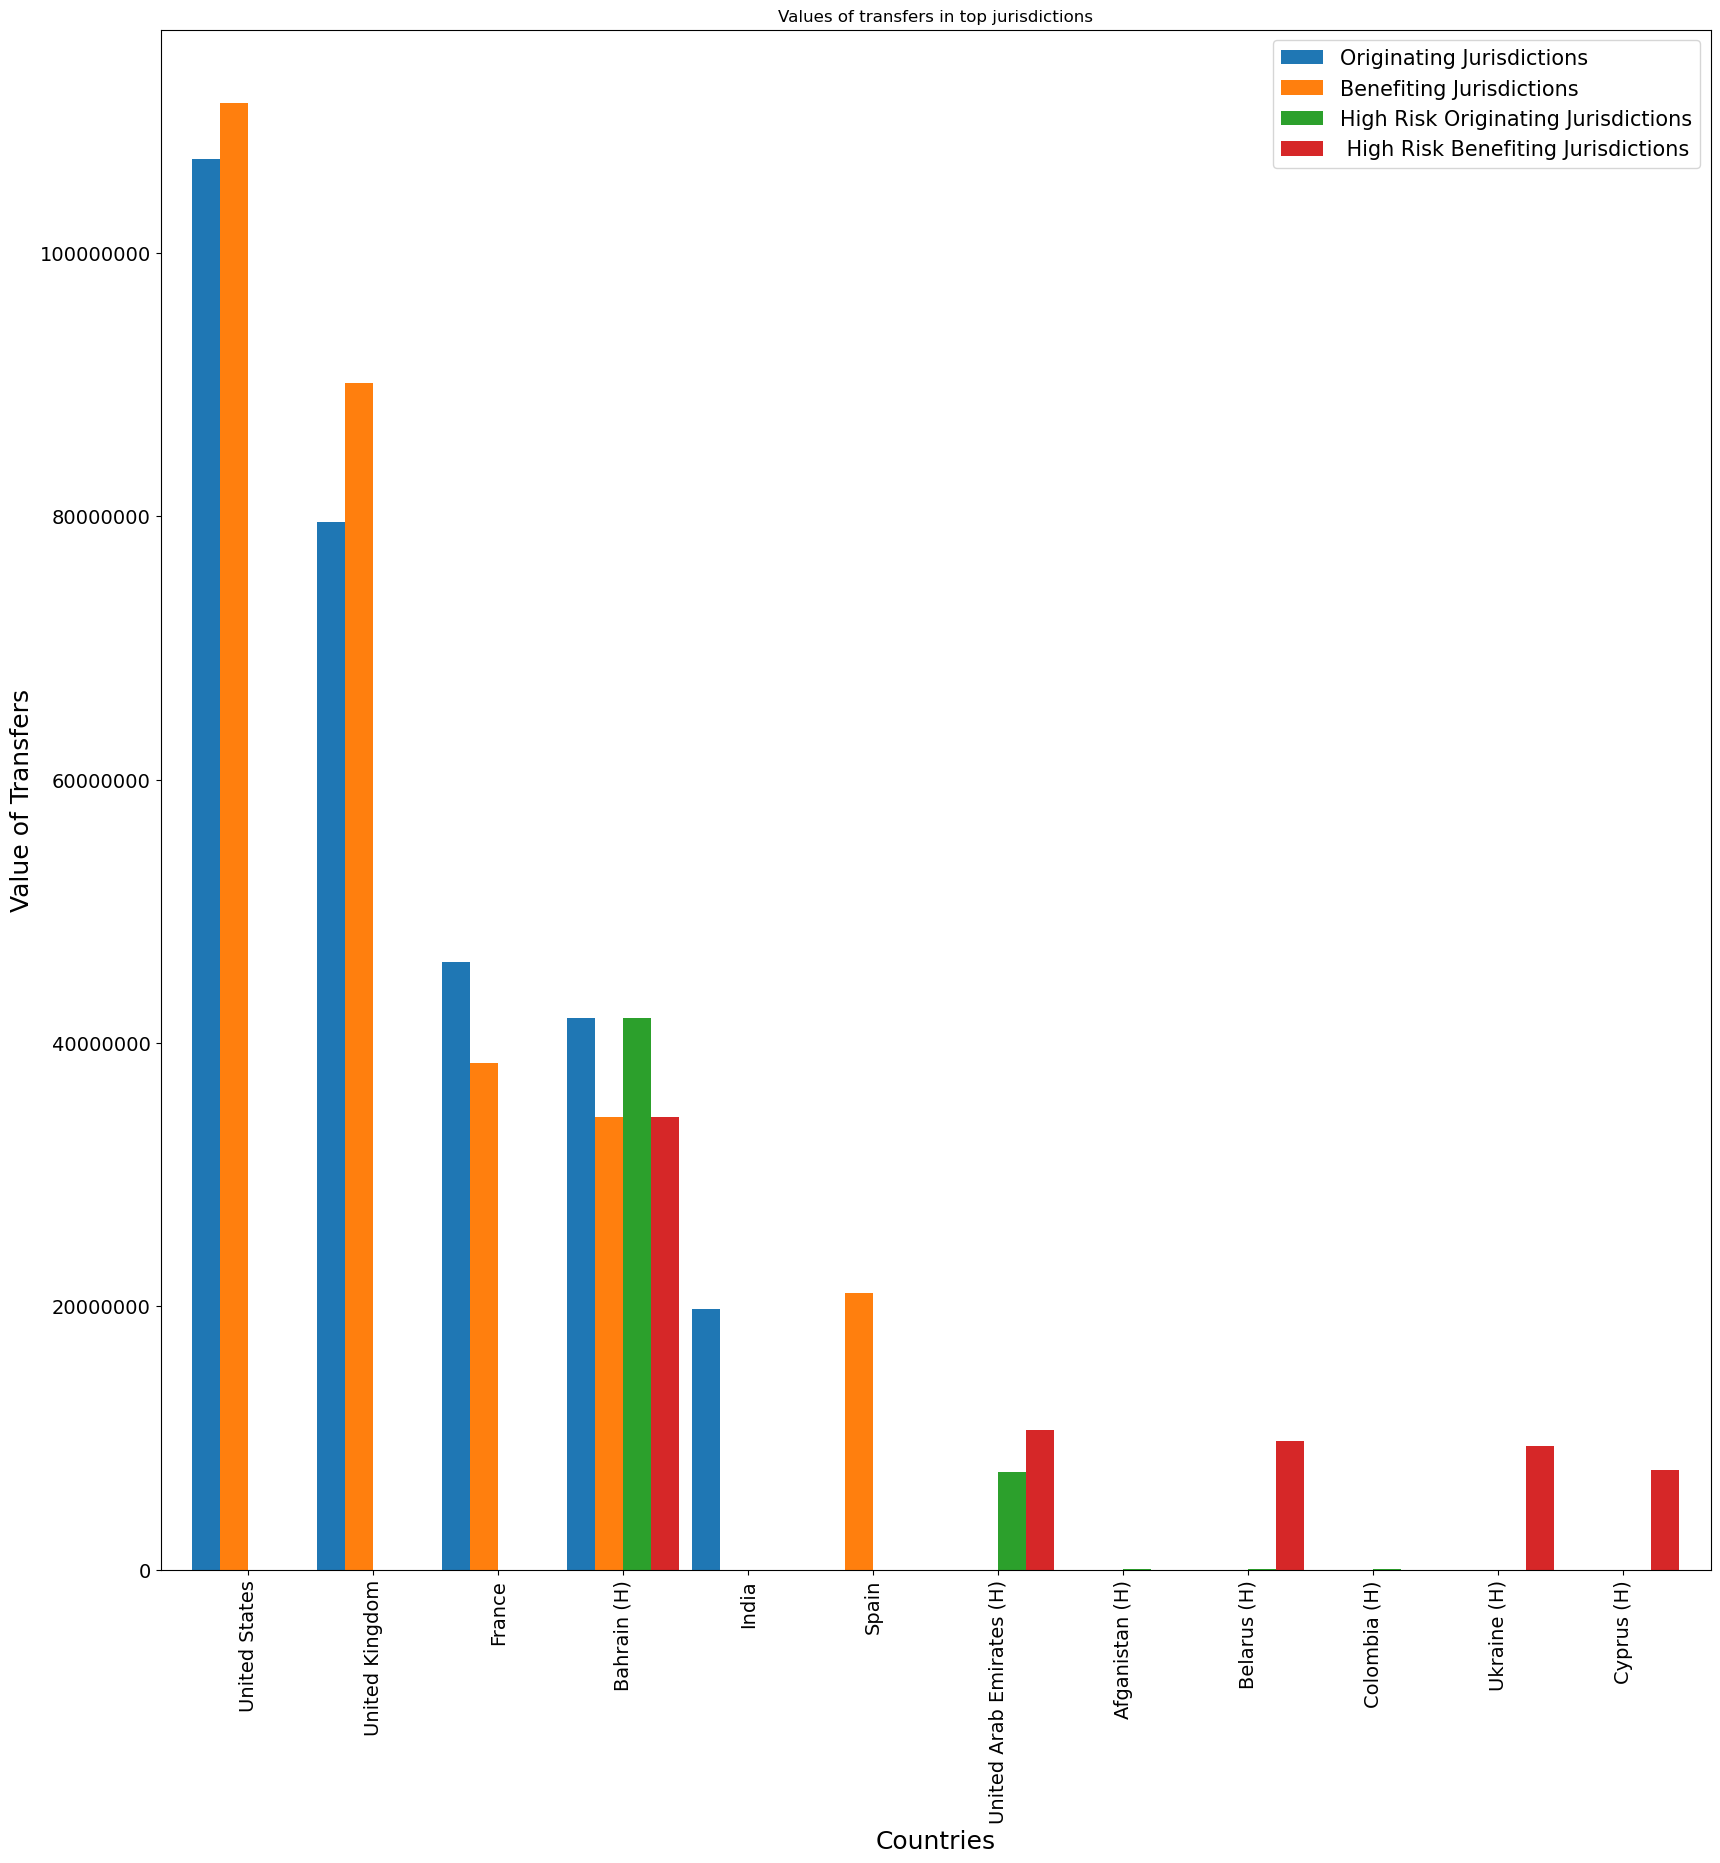

In [877]:
#creating a bar plot illustrating the transaction amount for a given country

fig = plt.figure()
JUR.plot.bar(x='Country', 
             y=['Value_ORG_JUR', 'Value_BNF_JUR', 'Value_HR_ORG_JUR', 'Value_HR_BNF_JUR'], 
             width = 0.9, 
             figsize=(20, 20)) 

plt.xlabel('Countries', fontsize=18)
plt.ylabel('Value of Transfers', fontsize=18)
plt.title('Values of transfers in top jurisdictions')

#['Originating Jurisdictions', 'Benefiting Jurisdictions', 'High Risk Originating Jurisdictions', ' High Risk Benefiting Jurisdictions']
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.legend(labels=['Originating Jurisdictions', 'Benefiting Jurisdictions', 'High Risk Originating Jurisdictions', ' High Risk Benefiting Jurisdictions'],\
           loc='upper right', fontsize=15) 
plt.show()

In [878]:
#creating new dataframes and changing name of the Country column
ORGJUR2= ORGJUR.rename(columns={'Country': 'Country_ORG_JUR'})
BNFJUR2 = BNFJUR.rename(columns={'Country': 'Country_BNF_JUR'})
HR_ORGJUR2 = HR_ORGJUR.rename(columns={'Country': 'Country_HR_ORG_JUR'})
HR_BNFJUR2 = HR_BNFJUR.rename(columns={'Country': 'Country_HR_BNF_JUR'})

In [879]:
JUR2 = pd.concat([ORGJUR2, BNFJUR2, HR_ORGJUR2, HR_BNFJUR2], axis=1)
JUR2 = JUR2.replace(['United Arab Emirates (H)'], 'UAE (H)')
JUR2

,Country_ORG_JUR,Value_ORG_JUR,Country_BNF_JUR,Value_BNF_JUR,Country_HR_ORG_JUR,Value_HR_ORG_JUR,Country_HR_BNF_JUR,Value_HR_BNF_JUR
0,United States,107142231.0,United States,111389282.0,Bahrain (H),41886071.0,Bahrain (H),34383536.0
1,United Kingdom,79588545.0,United Kingdom,90147357.0,UAE (H),7418502.0,UAE (H),10564209.0
2,France,46163104.0,France,38458298.0,Afganistan (H),56608.0,Belarus (H),9730803.0
3,Bahrain (H),41886071.0,Bahrain (H),34383536.0,Belarus (H),23686.0,Ukraine (H),9364341.0
4,India,19816686.0,Spain,21026548.0,Colombia (H),19051.0,Cyprus (H),7541421.0


C:\Users\kasia\AppData\Local\Temp\ipykernel_20004\860206575.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticklabels(), size = 13)
C:\Users\kasia\AppData\Local\Temp\ipykernel_20004\860206575.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticklabels(), size = 13)
C:\Users\kasia\AppData\Local\Temp\ipykernel_20004\860206575.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_yticklabels(c.get_yticklabels(), size = 13)
C:\Users\kasia\AppData\Local\Temp\ipykernel_20004\860206575.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_yticklabels(d.get_yticklabels(), size = 13)


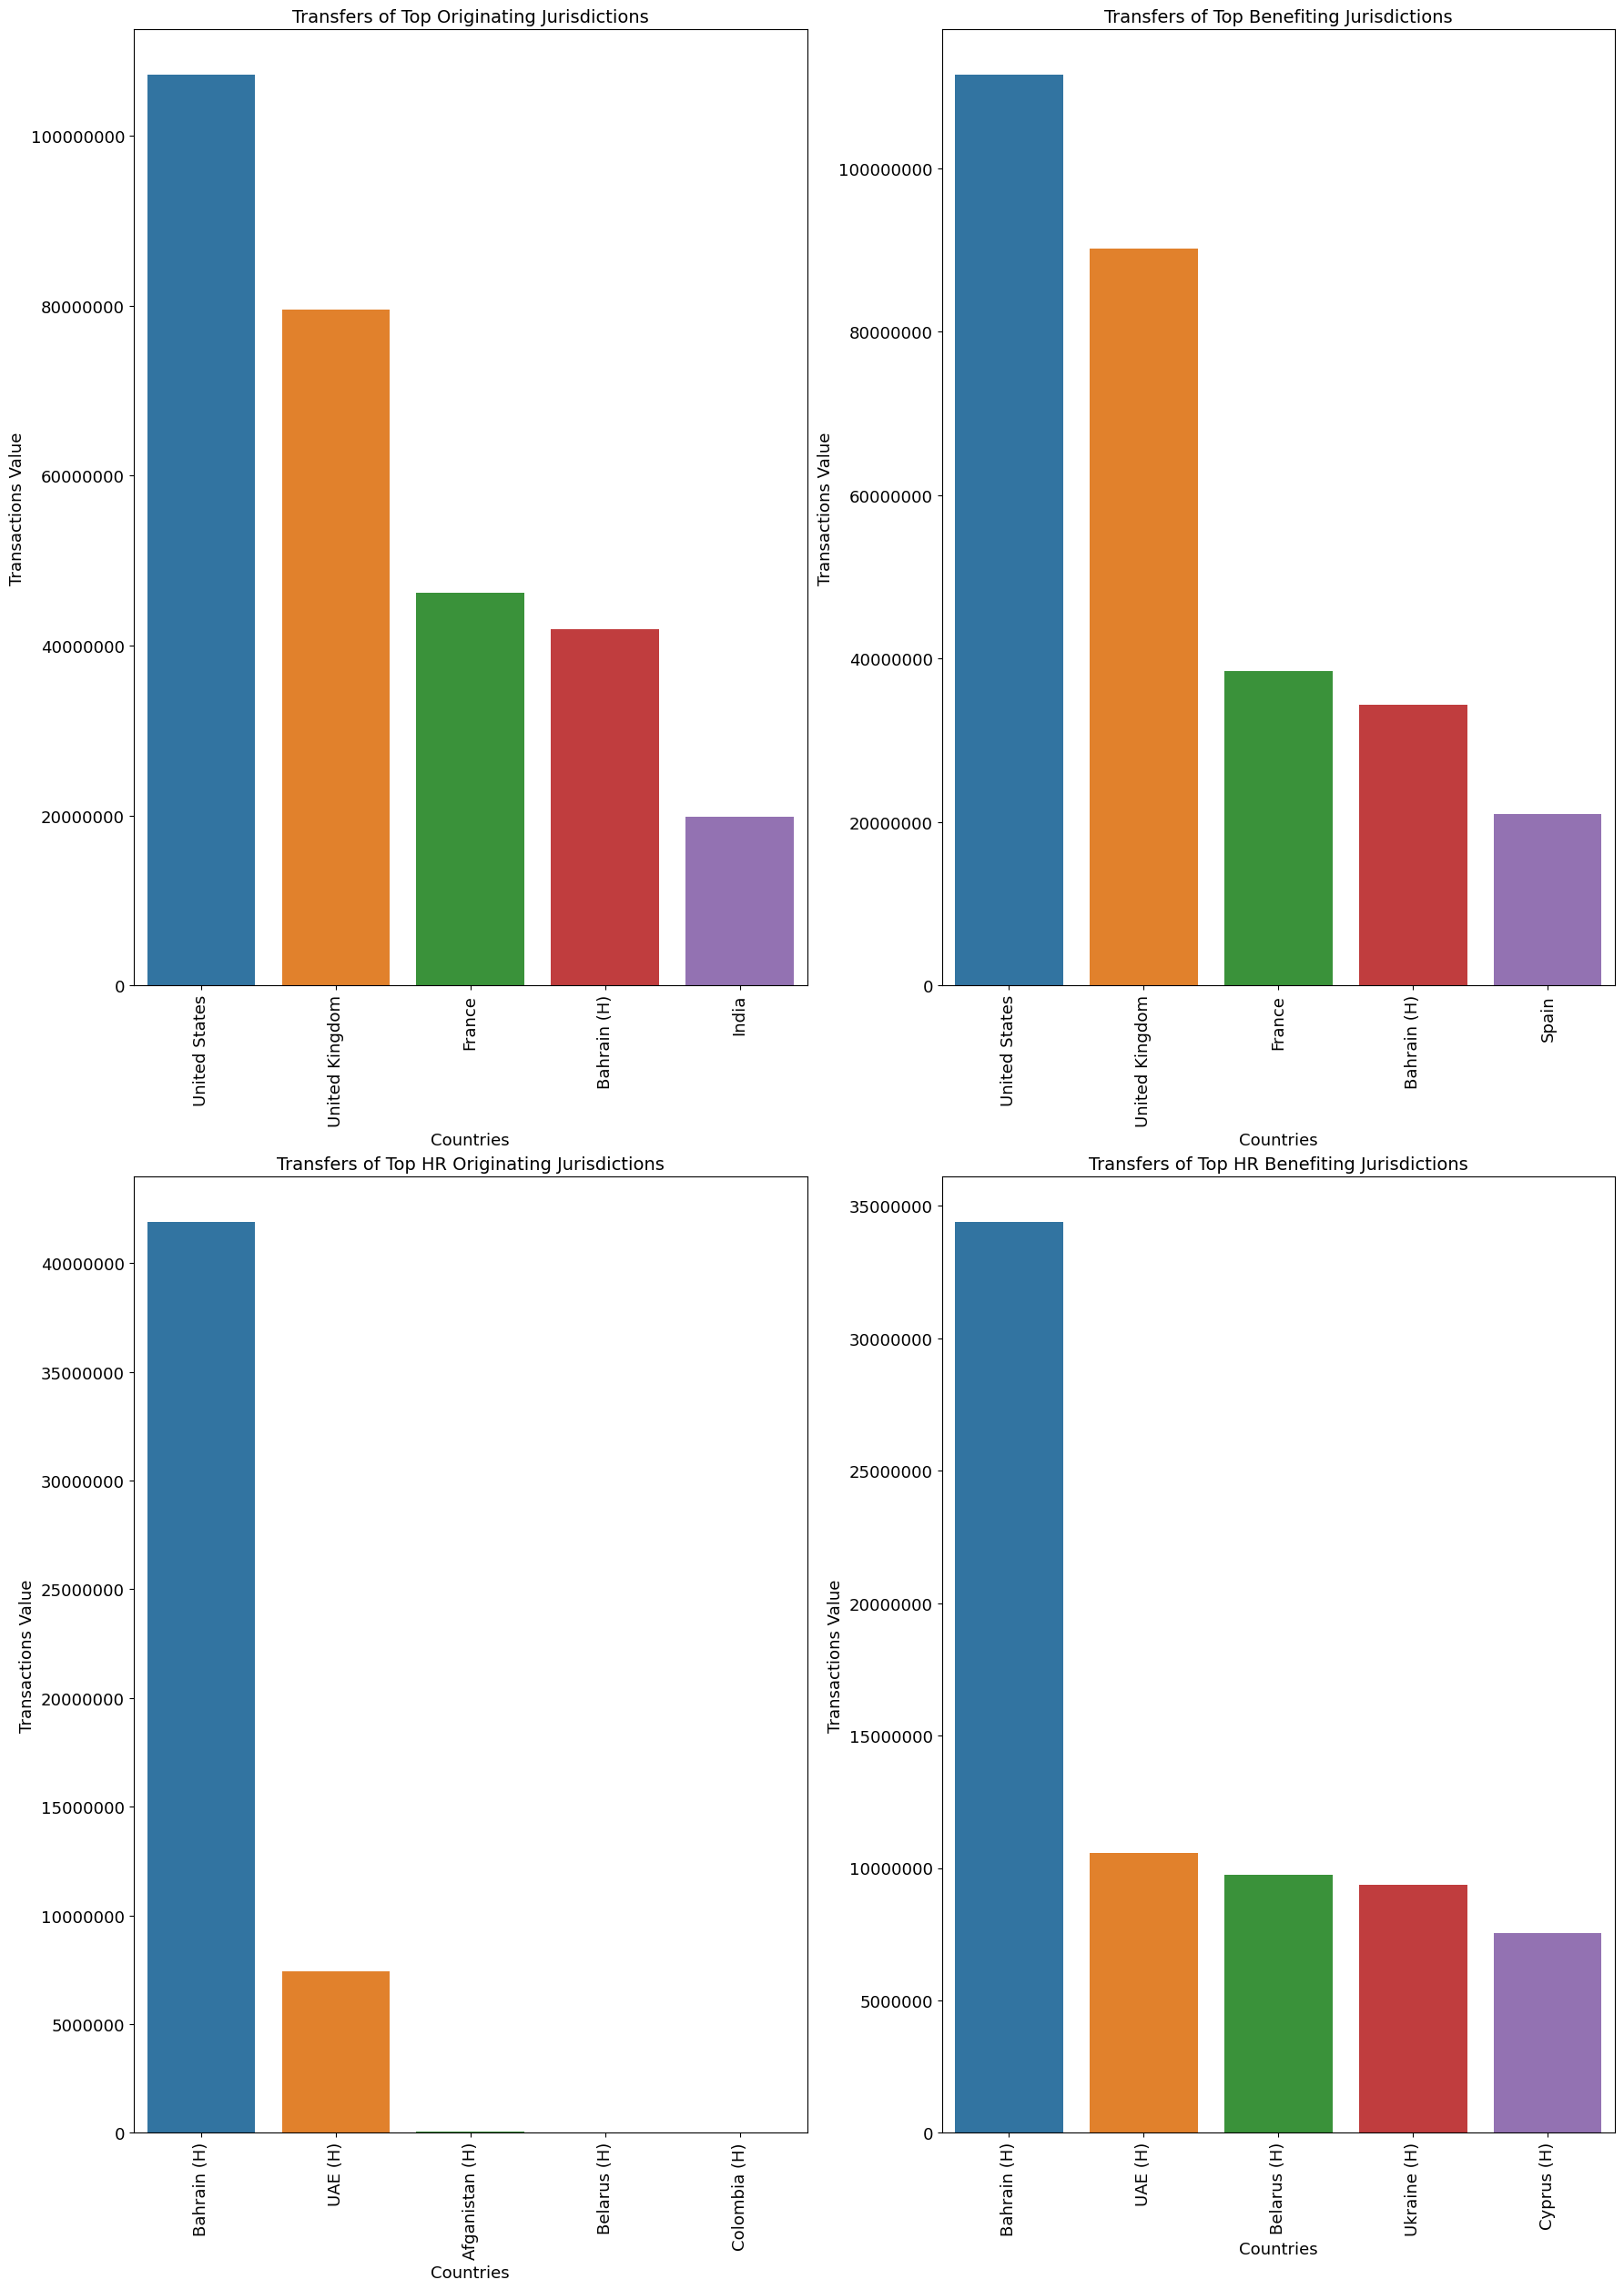

In [880]:
#creating four bar plots illustrating the transaction amounts in Top Originating Juridiction, Top HR Originating Jurisdictions,
#Top Benefiting Jurisdictions and Top HR Benefiting Jurisdictions

fig,ax = plt.subplots(2,2, figsize=(21,30))


#1st plot - Top originating countries
ax=ax.flatten()
a = sns.barplot(x='Country_ORG_JUR', y='Value_ORG_JUR', data=JUR2, ax=ax[0])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
a.set_yticklabels(a.get_yticklabels(), size = 13)
a.set_xticklabels(a.get_xticklabels(), size = 13, rotation=90)
a.set_ylabel('Transactions Value', size = 13)
a.set_xlabel('Countries', size = 13)
a.set_title('Transfers of Top Originating Jurisdictions', size = 14)

#2nd plot - Top HR originating countries
b = sns.barplot(x='Country_BNF_JUR', y='Value_BNF_JUR', data=JUR2, ax=ax[1])
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
b.set_yticklabels(b.get_yticklabels(), size = 13)
b.set_xticklabels(b.get_xticklabels(), size = 13, rotation=90)
b.set_ylabel('Transactions Value', size = 13)
b.set_xlabel('Countries', size = 13)
b.set_title('Transfers of Top Benefiting Jurisdictions', size = 14)

#3rd plot - Top benefiting countries
c = sns.barplot(x='Country_HR_ORG_JUR', y='Value_HR_ORG_JUR', data=JUR2, ax=ax[2])
plt.gcf().axes[2].yaxis.get_major_formatter().set_scientific(False)
c.set_yticklabels(c.get_yticklabels(), size = 13)
c.set_xticklabels(c.get_xticklabels(), size = 13, rotation=90)
c.set_ylabel('Transactions Value', size = 13)
c.set_xlabel('Countries', size = 13)
c.set_title('Transfers of Top HR Originating Jurisdictions', size = 14)

#4th plot - Top HR benefiting countries
d = sns.barplot(x='Country_HR_BNF_JUR', y='Value_HR_BNF_JUR', data=JUR2, ax=ax[3])
plt.gcf().axes[3].yaxis.get_major_formatter().set_scientific(False)
d.set_yticklabels(d.get_yticklabels(), size = 13)
d.set_xticklabels(d.get_xticklabels(), size = 13, rotation=90)
d.set_ylabel('Transactions Value', size = 13)
d.set_xlabel('Countries', size = 13)
d.set_title('Transfers of Top HR Benefiting Jurisdictions', size = 14)

plt.show()

In [881]:
for dataframe in list_df:
    dataframe.set_index('Country', inplace=True)

In [882]:
#Creating a list of countries which will be used to determine top originators and beneficiaries

Top_ORG_JUR_list = Top_ORG_JUR.index

Top_HR_ORG_JUR_list = Top_HR_ORG_JUR.index

Top_BNF_JUR_list = Top_BNF_JUR.index

Top_HR_BNF_JUR_list= Top_HR_BNF_JUR.index


In [883]:
Top_ORG_JUR_list

Index(['United States', 'United Kingdom', 'France', 'Bahrain (H)', 'India'], dtype='object', name='Country')

## Top Originators and Beneficiaries
Below is a function that creates Top Originators and Beneficiaries tables. Tables present top five entities or individuals which sent or received most significant transfers in terms of value and volume. 
To use the function alanayst needs to select Originator / Beneficiary and NoHR (all countries) / HR (only high risk countries)

In [884]:
def top5_ORG_BNF (ORG_BNF, Risk):
    
    if ORG_BNF == 'Originator':
        
        if Risk == 'NoHR':
            df1 = Commercial[Commercial['New_BBK_Country'].isin(Top_BNF_JUR_list)]
        
        elif Risk == 'HR':
            df1 = Commercial[Commercial['New_BBK_Country'].isin(Top_HR_BNF_JUR_list)]
            

        df = df1[df1['Credit/Debit'].str.contains('DEBIT')]\
            .loc[:, ['ORG_Name', 'Converted_Currency_Amount']].groupby('ORG_Name')\
            .agg(Value = ('Converted_Currency_Amount', 'sum'), Volume= ('Converted_Currency_Amount', 'count'))\
            .sort_values(by='Value', ascending=False).head(5)
                
                
    elif ORG_BNF == 'Beneficiary':
        
        if Risk == 'NoHR':
            df1 = Commercial[Commercial['New_OGB_Country'].isin(Top_ORG_JUR_list)]
       
        elif Risk == 'HR':
            df1 = Commercial[Commercial['New_OGB_Country'].isin(Top_HR_ORG_JUR_list)]
            
            
        df = df1[df1['Credit/Debit'].str.contains('CREDIT')]\
            .loc[:, ['BNF_Name', 'Converted_Currency_Amount']].groupby('BNF_Name')\
            .agg(Value = ('Converted_Currency_Amount', 'sum'), Volume= ('Converted_Currency_Amount', 'count'))\
            .sort_values(by='Value', ascending=False).head(5)
            
            
            
    
    #dodanie kolumn z % udziałem w total value/ volume
    df['% Value'] = (100 * df['Value']/Commercial['Converted_Currency_Amount'].sum()).round(2)
    df['% Volume'] = (100 * df['Volume']/Commercial['Converted_Currency_Amount'].count()).round(2)

    #dodanie wiersza z Total
    df.loc["TOTAL"] = df.sum().round(2)

    #dodanie znaku $ i % do tabeli
    df['Value'] = '$'+ df['Value'].map('{:,.0f}'.format)
    df['% Value'] = df['% Value'].astype(str) + '%'
    df['% Volume'] = df['% Volume'].astype(str) + '%'

    #zmieniam długą nazwe indexu na Country
    df= df.rename_axis(index= 'Company Name').reset_index()
    df.set_index('Company Name', inplace = True)
            
            

    return df   
    
    

In [885]:
# Top Originators
top_ORG = top5_ORG_BNF ('Originator', 'NoHR')
top_ORG

,Value,Volume,% Value,% Volume
Company Name,,,,
Samsung Electronics Co Ltd,"$41,467,104",5.0,5.26%,1.45%
Royal Dutch Shell Co,"$29,796,618",5.0,3.78%,1.45%
Evergreen Line,"$24,123,657",1.0,3.06%,0.29%
Western Union Co,"$21,036,940",7.0,2.67%,2.02%
McKinsey and Co,"$16,629,130",7.0,2.11%,2.02%
TOTAL,"$133,053,449",25.0,16.88%,7.23%


In [886]:
#Top HR Originators
top_HR_ORG = top5_ORG_BNF("Originator", "HR")
top_HR_ORG

,Value,Volume,% Value,% Volume
Company Name,,,,
Samsung Electronics Co Ltd,"$23,295,526",3.0,2.96%,0.87%
Citibank NA,"$19,534,532",2.0,2.48%,0.58%
Western Union Co,"$14,082,099",2.0,1.79%,0.58%
McKinsey and Co,"$5,695,536",1.0,0.72%,0.29%
Verspreid Net B V,"$5,037,897",1.0,0.64%,0.29%
TOTAL,"$67,645,590",9.0,8.59%,2.61%


In [887]:
#Top Beneficiaries
top_BNF = top5_ORG_BNF('Beneficiary', 'NoHR')
top_BNF

,Value,Volume,% Value,% Volume
Company Name,,,,
Lloyds Bank,"$52,313,328",9.0,6.64%,2.6%
Majestic Wine and Deli Inc,"$25,768,132",1.0,3.27%,0.29%
Samsung Electronics Co Ltd,"$20,035,117",4.0,2.54%,1.16%
Royal Dutch Shell Co,"$19,464,154",3.0,2.47%,0.87%
Ihs Inc,"$19,155,280",5.0,2.43%,1.45%
TOTAL,"$136,736,011",22.0,17.35%,6.37%


In [888]:
#Top HR Beneficiaries
top_HR_BNF = top5_ORG_BNF('Beneficiary', 'HR')
top_HR_BNF

,Value,Volume,% Value,% Volume
Company Name,,,,
Royal Dutch Shell Co,"$18,033,517",3.0,2.29%,0.87%
Docklands Bus and Coach Park,"$10,430,862",1.0,1.32%,0.29%
Procter and Gamble,"$9,729,999",1.0,1.23%,0.29%
Lloyds Bank,"$9,645,126",2.0,1.22%,0.58%
Arab Banking Corp B S C,"$836,110",1.0,0.11%,0.29%
TOTAL,"$48,675,614",8.0,6.17%,2.32%


## Top Originators and Beneficiaries by volume

Below is a function that creates Top Originators and Beneficiaries tables in terms of volume of transactions. 
To use the function alanayst needs to select Originator / Beneficiary and NoHR (all countries) / HR (only high risk countries)



In [889]:
def top5_ORG_BNF_Volume (ORG_BNF):
    
    if ORG_BNF == 'Originator':
        df= Commercial[Commercial['Credit/Debit'].str.contains('DEBIT')]\
        .loc[:, ['ORG_Name', 'Converted_Currency_Amount']].groupby('ORG_Name')\
        .agg(Volume= ('Converted_Currency_Amount', 'count'), Value = ('Converted_Currency_Amount', 'sum'))\
        .sort_values(by='Volume', ascending=False)\
        .head(5)
   
    elif ORG_BNF == 'Beneficiary':
        df = Commercial[Commercial['Credit/Debit'].str.contains('CREDIT')]\
        .loc[:, ['BNF_Name', 'Converted_Currency_Amount']].groupby('BNF_Name')\
        .agg(Volume= ('Converted_Currency_Amount', 'count'), Value = ('Converted_Currency_Amount', 'sum'))\
        .sort_values(by='Volume', ascending=False)\
        .head(5)
        
        
    df['% Volume'] = (100 * df['Volume']/Commercial['Converted_Currency_Amount'].count()).round(2)
    df['% Value'] = (100 * df['Value']/Commercial['Converted_Currency_Amount'].sum()).round(2)

    df.loc["TOTAL"] = df.sum().round(2)


    df['Value'] = '$'+ df['Value'].map('{:,.0f}'.format)
    df['% Volume'] = df['% Volume'].astype(str) + '%'
    df['% Value'] = df['% Value'].astype(str) + '%'

    df= df.rename_axis(index= 'Company Name').reset_index()
    df.set_index('Company Name', inplace = True)


    return df
        
        

In [890]:
#Top Originators by volume
Top_ORG_Volume = top5_ORG_BNF_Volume('Originator')
Top_ORG_Volume

,Volume,Value,% Volume,% Value
Company Name,,,,
Arab Banking Corp B S C,13.0,"$30,494,436",3.76%,3.87%
Western Union Co,10.0,"$30,507,153",2.89%,3.87%
McKinsey and Co,10.0,"$18,895,869",2.89%,2.4%
Tesco,9.0,"$3,729,957",2.6%,0.47%
Samsung Electronics Co Ltd,9.0,"$56,288,275",2.6%,7.14%
TOTAL,51.0,"$139,915,691",14.74%,17.75%


In [891]:
#Top Beneficiaries by volume
Top_BNF_Volume = top5_ORG_BNF_Volume('Beneficiary')
Top_BNF_Volume

,Volume,Value,% Volume,% Value
Company Name,,,,
Lloyds Bank,11.0,"$52,911,989",3.18%,6.71%
Western Union Co,10.0,"$10,869,013",2.89%,1.38%
Arab Banking Corp B S C,7.0,"$15,706,212",2.02%,1.99%
Tesco,6.0,"$6,570,495",1.73%,0.83%
PwC Advisory Strategyand,6.0,"$8,610,376",1.73%,1.09%
TOTAL,40.0,"$94,668,086",11.55%,12.0%
